# Phase 2 Code Challenge Review

The topics covered will be:

1. SQL
2. Bayesian Statistics
3. Normal Distributions
4. Statistical Tests

In [ ]:
# from src.call import call_on_students

## Part 1: SQL

In [1]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

In [3]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [4]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


In [18]:
pd.read_sql(
    """
    SELECT *
    FROM sqlite_master
    """, conn
).iloc[5]['sql']

'CREATE TABLE [Invoice]\n(\n    [InvoiceId] INTEGER  NOT NULL,\n    [CustomerId] INTEGER  NOT NULL,\n    [InvoiceDate] DATETIME  NOT NULL,\n    [BillingAddress] NVARCHAR(70),\n    [BillingCity] NVARCHAR(40),\n    [BillingState] NVARCHAR(40),\n    [BillingCountry] NVARCHAR(40),\n    [BillingPostalCode] NVARCHAR(10),\n    [Total] NUMERIC(10,2)  NOT NULL,\n    CONSTRAINT [PK_Invoice] PRIMARY KEY  ([InvoiceId]),\n    FOREIGN KEY ([CustomerId]) REFERENCES [Customer] ([CustomerId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)'

### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [ ]:
# call_on_students(1)

In [6]:
pd.read_sql("""

SELECT customerid
FROM customer
WHERE country = 'Germany'


""", conn)

,CustomerId
0,2
1,36
2,37
3,38


### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [ ]:
# call_on_students(1)

In [9]:
pd.read_sql("""

SELECT Lastname, email, address
FROM customer
WHERE country = 'Canada'


""", conn)

,LastName,Email,Address
0,Tremblay,ftremblay@gmail.com,1498 rue Bélanger
1,Philips,mphilips12@shaw.ca,8210 111 ST NW
2,Peterson,jenniferp@rogers.ca,700 W Pender Street
3,Brown,robbrown@shaw.ca,796 Dundas Street West
4,Francis,edfrancis@yachoo.ca,230 Elgin Street
5,Silk,marthasilk@gmail.com,194A Chain Lake Drive
6,Mitchell,aaronmitchell@yahoo.ca,696 Osborne Street
7,Sullivan,ellie.sullivan@shaw.ca,5112 48 Street


In [12]:
pd.read_sql("""

SELECT DISTINCT lastname, email, address, billingaddress
FROM customer c
    JOIN invoice i
        USING(customerid)
WHERE country = 'Canada'


""", conn)

,LastName,Email,Address,BillingAddress
0,Philips,mphilips12@shaw.ca,8210 111 ST NW,8210 111 ST NW
1,Silk,marthasilk@gmail.com,194A Chain Lake Drive,194A Chain Lake Drive
2,Sullivan,ellie.sullivan@shaw.ca,5112 48 Street,5112 48 Street
3,Peterson,jenniferp@rogers.ca,700 W Pender Street,700 W Pender Street
4,Brown,robbrown@shaw.ca,796 Dundas Street West,796 Dundas Street West
5,Francis,edfrancis@yachoo.ca,230 Elgin Street,230 Elgin Street
6,Mitchell,aaronmitchell@yahoo.ca,696 Osborne Street,696 Osborne Street
7,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,1498 rue Bélanger


### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [ ]:
# call_on_students(1)

In [16]:
pd.read_sql("""

SELECT billingcountry, SUM(total) as billing_total
FROM invoice
GROUP BY billingcountry
ORDER BY billing_total DESC

""", conn)

,BillingCountry,billing_total
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

In [ ]:
# call_on_students(1)

In [20]:
pd.read_sql("""

SELECT *
FROM invoice
LIMIT 3


""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceId          3 non-null      int64  
 1   CustomerId         3 non-null      int64  
 2   InvoiceDate        3 non-null      object 
 3   BillingAddress     3 non-null      object 
 4   BillingCity        3 non-null      object 
 5   BillingState       0 non-null      object 
 6   BillingCountry     3 non-null      object 
 7   BillingPostalCode  3 non-null      object 
 8   Total              3 non-null      float64
dtypes: float64(1), int64(2), object(6)
memory usage: 344.0+ bytes


In [23]:
pd.read_sql("""

SELECT lastname, email, billingaddress, MAX(invoicedate) AS most_recent
FROM customer c
    JOIN invoice i 
        USING(customerid)
GROUP BY customerid
HAVING most_recent > "2011-12-31"


""", conn)

,LastName,Email,BillingAddress,most_recent
0,Gonçalves,luisg@embraer.com.br,"Av. Brigadeiro Faria Lima, 2170",2013-08-07 00:00:00
1,Köhler,leonekohler@surfeu.de,Theodor-Heuss-Straße 34,2012-07-13 00:00:00
2,Tremblay,ftremblay@gmail.com,1498 rue Bélanger,2013-09-20 00:00:00
3,Hansen,bjorn.hansen@yahoo.no,Ullevålsveien 14,2013-10-03 00:00:00
4,Wichterlová,frantisekw@jetbrains.com,Klanova 9/506,2013-05-06 00:00:00
5,Holý,hholy@gmail.com,Rilská 3174/6,2013-11-13 00:00:00
6,Gruber,astrid.gruber@apple.at,"Rotenturmstraße 4, 1010 Innere Stadt",2013-06-19 00:00:00
7,Peeters,daan_peeters@apple.be,Grétrystraat 63,2013-10-04 00:00:00
8,Nielsen,kara.nielsen@jubii.dk,Sønder Boulevard 51,2013-02-02 00:00:00
9,Martins,eduardo@woodstock.com.br,"Rua Dr. Falcão Filho, 155",2013-08-12 00:00:00


## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 
> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

In [ ]:
# call_on_students(1)

**1. Which probability are we trying to find?**

   - Probability of being democrat given individual voted no P(dem|no)
   

**2. Based on that, what other pieces do we need?**

   - total probability of voting no (2 branches)
   - known probs
       - p(dem) = 0.60
       - p(reb) = 0.40
       - p(no|dem) = 0.75
       - p(yes|dem) = 0.25
       - p(no|reb) = 0.05
       - p(yes|reb) = 0.95
    

**3. Result?**

   - 

In [25]:
p_dem = 0.60
p_reb = 0.40
p_no_dem = 0.75
p_yes_dem = 0.25
p_no_reb = 0.05
p_yes_reb = 0.95

In [27]:
p_no = (p_dem * p_no_dem) + (p_reb * p_no_reb)
p_demo_no =   (p_dem * p_no_dem) / p_no
p_demo_no * 100

95.74468085106382

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [ ]:
# call_on_students(1)

In [28]:
# Code here
mu = 6
sigma = 2
x = 8
z_eight = (x - mu) / sigma
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [ ]:
# call_on_students(1)

In [29]:
from scipy import stats

In [31]:
# Code here
over_eight = stats.norm.sf(z_eight)
over_eight

0.15865525393145707

In [32]:
1 - stats.norm.cdf(z_eight)

0.15865525393145707

In [33]:
stats.norm(loc=6, scale=2).sf(8)

0.15865525393145707

### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [ ]:
# call_on_students(1)

In [37]:
# Code here
x_bar = 5
s = .5
n = 7
confidence = .95

t_crit = stats.t.ppf(.975, df=n-1)
se = s / (n**.5)
margin_error = t_crit * se

lower_bound = x_bar - margin_error
upper_bound = x_bar + margin_error

lower_bound, upper_bound

(4.53757712628571, 5.46242287371429)

In [36]:
(1 + confidence) / 2

0.975

In [43]:
stats.t.interval(alpha=.95, loc=x_bar, scale=se, df=n-1)

(4.53757712628571, 5.46242287371429)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

Interpret: 

- We are 95% confident that the true mean hours of sleep for this freshman fall b/t our interval of 4.54 and 5.46


## Part 4: Statistical Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [ ]:
# call_on_students(1)

In [44]:
# Imports - need pandas and matplotlib
import matplotlib.pyplot as plt

In [45]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv('data/auto-mpg.csv')

In [46]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [47]:
# Check the info on our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [48]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [49]:
df.describe(include='object')

,car name
count,392
unique,301
top,toyota corolla
freq,5


In [50]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

<AxesSubplot:xlabel='model year', ylabel='mpg'>

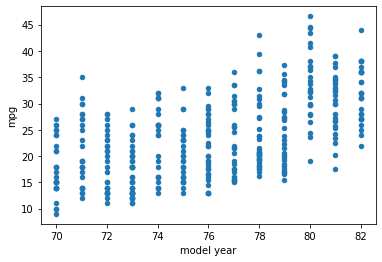

In [54]:
df.plot.scatter('model year', 'mpg')

In [55]:
import seaborn as sns

<AxesSubplot:xlabel='model year', ylabel='mpg'>

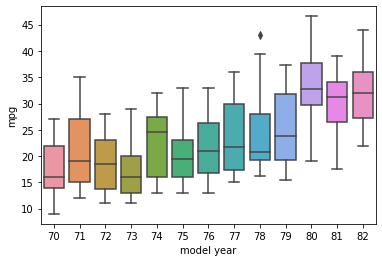

In [56]:
sns.boxplot(x='model year', y = 'mpg', data=df)

<AxesSubplot:>

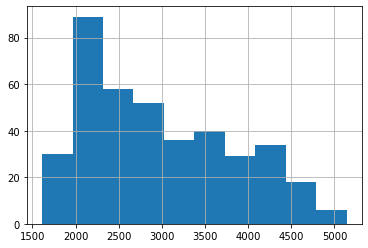

In [59]:
df['weight'].hist()

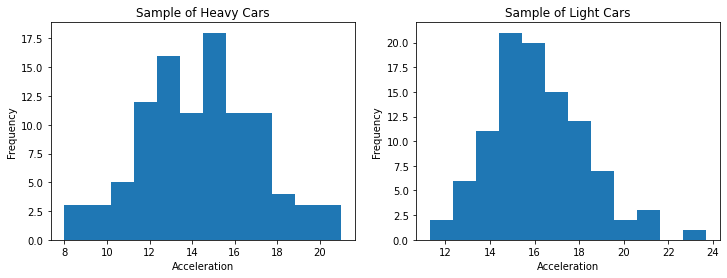

In [60]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

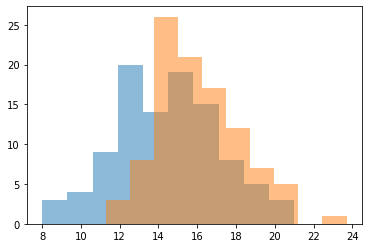

In [65]:
plt.figure()
plt.hist(heavy_cars['acceleration'], alpha=.5)
plt.hist(light_cars['acceleration'], alpha=.5);

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**

- Light cars do not accelerate faster on average than heavy cars


**Alternative hypothesis:**

- Light cars do accelerate faster on average than heavy cars


### Task 12: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**

- False positive: Our tests shows that light cars have signficantly faster acceleration than heavy cars, when in reality they do not accelerate faster.


**Type II Error:**

- False Negative: Our test shows that fast cars do not accelerate faster than heavy cars when in reality they do.



### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

In [ ]:
# call_on_students(1)

Description:

- sample t-test (continuous numeric variables)
- one sided, greather than (right tailed)


### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [66]:
# Code here
stats.ttest_ind(heavy_cars['acceleration'], light_cars['acceleration'])

Ttest_indResult(statistic=-5.00874014469676, pvalue=1.2096440668168987e-06)

In [67]:
stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'])

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)

In [68]:
stat, pvalue = stats.ttest_ind(heavy_cars['acceleration'], light_cars['acceleration'])
pvalue / 2

6.048220334084493e-07

In [69]:
stat, pvalue = stats.ttest_ind(heavy_cars['acceleration'], light_cars['acceleration'], equal_var=False)
pvalue / 2

6.206452844604151e-07

In [70]:
light_cars['acceleration'].mean(), heavy_cars['acceleration'].mean()

(16.104, 14.350999999999999)

### 13c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

Can you reject the null hypothesis?

- if the p is low the null must go, p < alphas ---> reject the null in favor of alternative
